In [1]:
import pandas as pd

import matplotlib.pyplot as plt
class KomunalnaSluzba:
    def __init__(self, ID, name):
        self.ID = ID
        self.name = name
        
class Worker:
    def __init__(self, ID, surname, numberCategory):
        self.ID = ID
        self.surname = surname
        self.numberCategory = numberCategory
        
class DoneWork:
    def __init__(self, date, numberOfService, workerNumber, hours):
        self.date = date
        self.numberOfService = numberOfService
        self.workerNumber = workerNumber
        self.hours = hours
        
class SpecTecnic:
    def __init__(self, date, numberOfService, fuel):
        self.date = date
        self.numberOfService = numberOfService
        self.fuel = fuel
        
        
            


<img src="./foto.jpg" alt="">

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

communalService = pd.read_csv('communalService.csv', index_col = "idCommunal", sep=';')
communalService

employee=pd.read_csv('employee.csv', index_col = "idEmployee", sep=';')
employee
employeeOrder = pd.read_csv('employeeOrder.csv', sep=';')
technicsOrder = pd.read_csv('technicsOrder.csv', sep=";")

costGas = 55
costCategory = [100, 125, 140, 150]
categoryPay = pd.DataFrame(costCategory, columns=['categoryPay'], index=range(1, len(costCategory) + 1))

employeeOrder=employeeOrder.join(employee,on="idEmployee").join(communalService,on="idCommunal").join(categoryPay, on='numberCategory')

employeeOrder['totalCostEmployee'] = employeeOrder['hours'] * employeeOrder['categoryPay']

display(employeeOrder)

totalCost= employeeOrder['totalCostEmployee'].sum()
print(f'totalCost employee  {totalCost}  Grn')



,date,idCommunal,idEmployee,hours,surname,numberCategory,name,categoryPay,totalCostEmployee
0,2020.12.10,1,1,8,Polishchuk,2,Pivdenna,125,1000
1,2020.12.18,2,2,8,Stetan,1,Zahidna,100,800
2,2020.12.10,3,3,8,Kolisnuk,3,Shidna,140,1120
3,2020.12.10,2,4,8,Senuk,2,Zahidna,125,1000
4,2020.12.20,4,5,5,Harner,4,Pivnichna,150,750
5,2020.12.10,1,6,8,Dovbush,3,Pivdenna,140,1120
6,2020.12.11,1,1,8,Polishchuk,2,Pivdenna,125,1000
7,2020.12.19,2,2,8,Stetan,1,Zahidna,100,800
8,2020.12.11,3,3,10,Kolisnuk,3,Shidna,140,1400
9,2020.12.18,3,4,8,Senuk,2,Shidna,125,1000


totalCost employee  19410  Grn


In [9]:

groupTable = pd.concat([employeeOrder, technicsOrder], ignore_index=True).fillna(0)
groupTable['totalCostTechnicsAndEmployee'] = groupTable['totalCostEmployee'] + groupTable['petrol'] * costGas
display(groupTable)

newTableTotalCostEmployee = groupTable[["date","totalCostEmployee"]].groupby(["date"]).sum()
display(newTableTotalCostEmployee)

newTableTotalCostTechnicsAndEmployee = groupTable[["date","totalCostTechnicsAndEmployee"]].groupby(["date"]).sum()
display(newTableTotalCostTechnicsAndEmployee)

newTableNameEmployeePay = employeeOrder[["surname","totalCostEmployee"]].groupby(["surname"]).sum().reset_index()
display(newTableNameEmployeePay)


,date,idCommunal,idEmployee,hours,surname,numberCategory,name,categoryPay,totalCostEmployee,petrol,totalCostTechnicsAndEmployee
0,2020.12.10,1,1.0,8.0,Polishchuk,2.0,Pivdenna,125.0,1000.0,0.0,1000.0
1,2020.12.18,2,2.0,8.0,Stetan,1.0,Zahidna,100.0,800.0,0.0,800.0
2,2020.12.10,3,3.0,8.0,Kolisnuk,3.0,Shidna,140.0,1120.0,0.0,1120.0
3,2020.12.10,2,4.0,8.0,Senuk,2.0,Zahidna,125.0,1000.0,0.0,1000.0
4,2020.12.20,4,5.0,5.0,Harner,4.0,Pivnichna,150.0,750.0,0.0,750.0
5,2020.12.10,1,6.0,8.0,Dovbush,3.0,Pivdenna,140.0,1120.0,0.0,1120.0
6,2020.12.11,1,1.0,8.0,Polishchuk,2.0,Pivdenna,125.0,1000.0,0.0,1000.0
7,2020.12.19,2,2.0,8.0,Stetan,1.0,Zahidna,100.0,800.0,0.0,800.0
8,2020.12.11,3,3.0,10.0,Kolisnuk,3.0,Shidna,140.0,1400.0,0.0,1400.0
9,2020.12.18,3,4.0,8.0,Senuk,2.0,Shidna,125.0,1000.0,0.0,1000.0


,totalCostEmployee
date,
2020.12.10,4240.0
2020.12.11,5010.0
2020.12.12,6810.0
2020.12.13,0.0
2020.12.14,0.0
2020.12.15,0.0
2020.12.16,0.0
2020.12.18,1800.0
2020.12.19,800.0


,totalCostTechnicsAndEmployee
date,
2020.12.10,12765.0
2020.12.11,12490.0
2020.12.12,17205.0
2020.12.13,13750.0
2020.12.14,19250.0
2020.12.15,2640.0
2020.12.16,3575.0
2020.12.18,1800.0
2020.12.19,14550.0


,surname,totalCostEmployee
0,Dovbush,3640
1,Harner,3450
2,Kolisnuk,3920
3,Polishchuk,3000
4,Senuk,3000
5,Stetan,2400


<Axes: xlabel='date'>

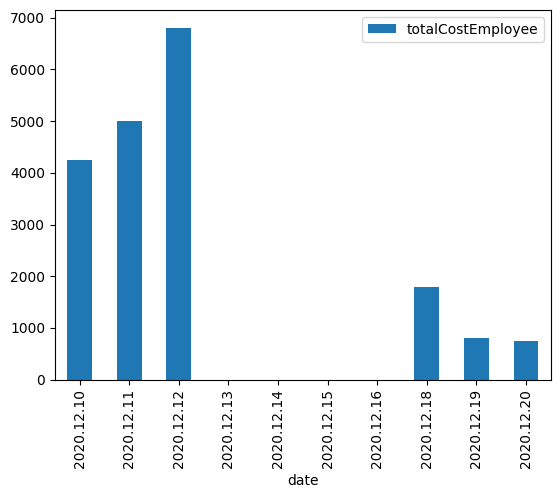

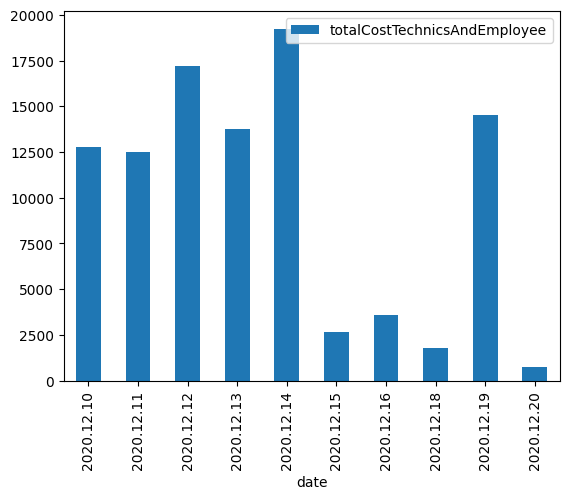

In [4]:

diagram = newTableTotalCostEmployee.plot.bar()
diagram
diagram = newTableTotalCostTechnicsAndEmployee.plot.bar()
diagram


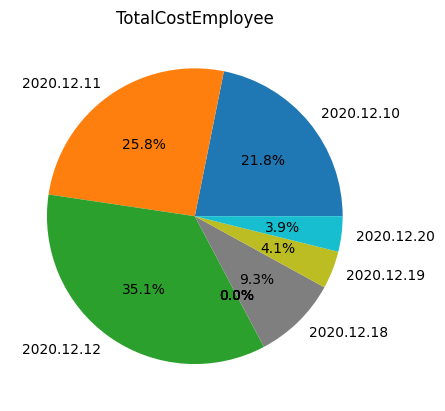

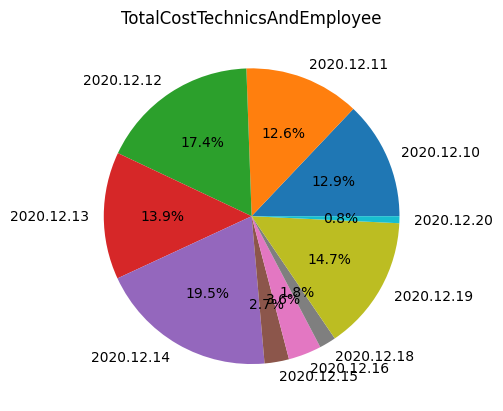

In [6]:
newTableTotalCostEmployeeCircle = groupTable.groupby("date")["totalCostEmployee"].sum()

newTableTotalCostTechnicsAndEmployeeCircle = groupTable.groupby("date")["totalCostTechnicsAndEmployee"].sum()

newTableTotalCostEmployeeCircle.plot(kind='pie', autopct='%1.1f%%')
plt.title('TotalCostEmployee')
plt.ylabel('')
plt.show()
newTableTotalCostTechnicsAndEmployeeCircle.plot(kind='pie', autopct='%1.1f%%')
plt.title('TotalCostTechnicsAndEmployee')
plt.ylabel('')
plt.show()

In [15]:
import ipywidgets as widgets
display(newTableNameEmployeePay)

def get_total_cost_of_computers_by_brand(name):
    total_cost = newTableNameEmployeePay[newTableNameEmployeePay["surname"] == name]["totalCostEmployee"].values[0]
    return total_cost
widgets.interact(get_total_cost_of_computers_by_brand, name=widgets.Dropdown(options = newTableNameEmployeePay["surname"].unique()) )

,surname,totalCostEmployee
0,Dovbush,3640
1,Harner,3450
2,Kolisnuk,3920
3,Polishchuk,3000
4,Senuk,3000
5,Stetan,2400


interactive(children=(Dropdown(description='name', options=('Dovbush', 'Harner', 'Kolisnuk', 'Polishchuk', 'Se…

<function __main__.get_total_cost_of_computers_by_brand(name)>